In [2]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/f8/69/dc769cf54df8e828c0b8957b4521f35178f5bd4cc5b8fbe8a37ffd89a27c/torchvision-0.19.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.19.1-cp311-cp311-win_amd64.whl.metadata (6.1 kB)
Using cached torchvision-0.19.1-cp311-cp311-win_amd64.whl (1.3 MB)


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Задаем параметры
batch_size = 128  # размер batch

# Трансформации для данных (например, нормализация)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])


# Загрузка CIFAR-100
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Создание DataLoader для тренировочного и тестового датасетов
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Проверим, что данные загружены корректно
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"Размер загруженного батча изображений: {images.size()}")


URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [19]:
import torch.nn as nn

# Определим ограниченную Leaky ReLU функцию активации
class LimitedLeakyReLU(nn.Module):
    def forward(self, x):
        return torch.max(0.1 * x, 0.5 * x)

class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 100)
        self.dropout = nn.Dropout(0.2)
        self.activation = LimitedLeakyReLU()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.dropout(self.activation(self.bn1(self.fc1(x))))
        x = self.dropout(self.activation(self.bn2(self.fc2(x))))
        x = self.activation(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x


# Инициализируем модель
model = ImprovedNet()

# Проверка модели на случайном входе
input_data = torch.randn(64, 3, 32, 32)  # Пакет из 64 изображений размером 32x32 с 3 каналами (RGB)
output_data = model(input_data)

print(f"Размер выхода: {output_data.size()}")  # Ожидаемый размер: [64, 100]


Размер выхода: torch.Size([64, 100])


In [20]:
import torch.optim as optim
# 3. Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


# 4. Цикл обучения
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Обнуление градиентов
        optimizer.zero_grad()

        # Прямой проход
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Обратный проход и шаг оптимизации
        loss.backward()
        optimizer.step()

        # Вывод статистики
        running_loss += loss.item()
        if i % 100 == 99:    # Каждые 100 мини-батчей
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Обучение завершено')

# 5. Оценка на тестовых данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Точность на тестовом наборе: {100 * correct / total:.2f}%')

Epoch [1/30], Step [100/391], Loss: 4.3394
Epoch [1/30], Step [200/391], Loss: 4.0713
Epoch [1/30], Step [300/391], Loss: 3.9370
Epoch [2/30], Step [100/391], Loss: 3.7939
Epoch [2/30], Step [200/391], Loss: 3.7448
Epoch [2/30], Step [300/391], Loss: 3.7036
Epoch [3/30], Step [100/391], Loss: 3.6246
Epoch [3/30], Step [200/391], Loss: 3.6344
Epoch [3/30], Step [300/391], Loss: 3.5925
Epoch [4/30], Step [100/391], Loss: 3.5447
Epoch [4/30], Step [200/391], Loss: 3.5265
Epoch [4/30], Step [300/391], Loss: 3.5296
Epoch [5/30], Step [100/391], Loss: 3.4814
Epoch [5/30], Step [200/391], Loss: 3.4848
Epoch [5/30], Step [300/391], Loss: 3.4644
Epoch [6/30], Step [100/391], Loss: 3.4382
Epoch [6/30], Step [200/391], Loss: 3.4460
Epoch [6/30], Step [300/391], Loss: 3.4153
Epoch [7/30], Step [100/391], Loss: 3.3983
Epoch [7/30], Step [200/391], Loss: 3.4138
Epoch [7/30], Step [300/391], Loss: 3.3733
Epoch [8/30], Step [100/391], Loss: 3.3725
Epoch [8/30], Step [200/391], Loss: 3.3731
Epoch [8/30

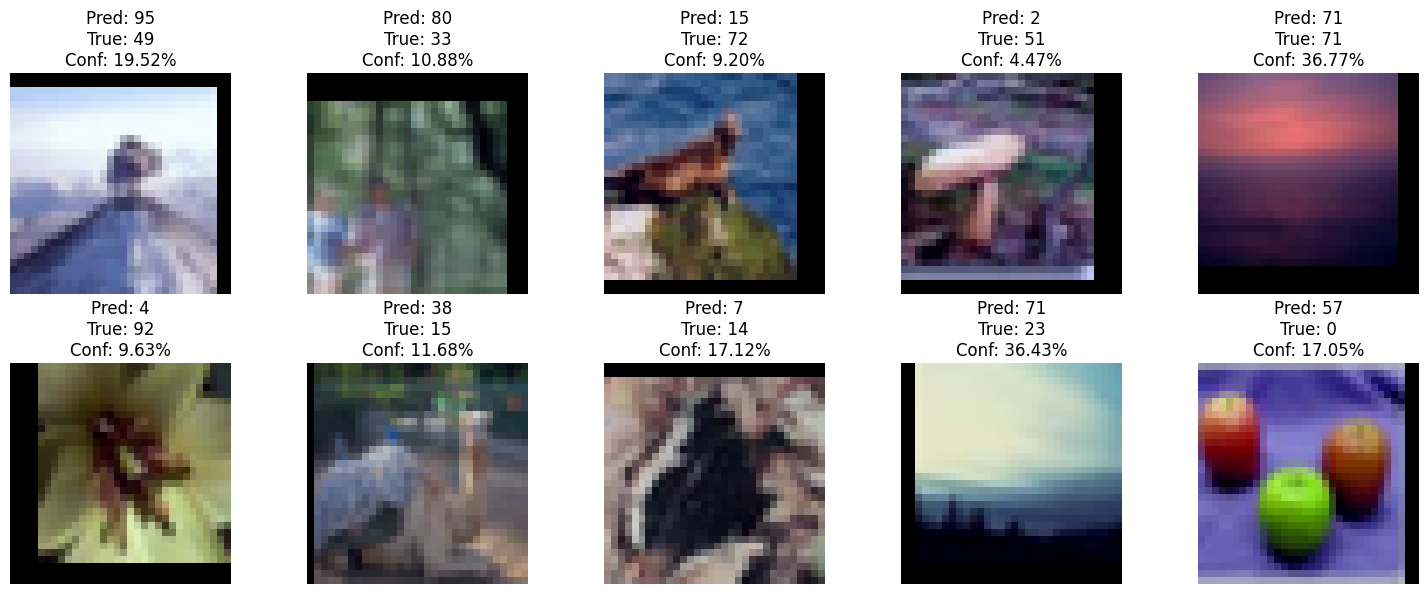

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для визуализации предсказаний
def visualize_predictions(model, data_loader, device, num_images=10):
    # Переключаем модель в режим оценки
    model.eval()

    # Создаем фигуру для отображения
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    axs = axs.ravel()  # для удобного доступа к каждому subplot

    # Перебираем тестовый набор
    dataiter = iter(data_loader)
    images, labels = next(dataiter)
    images, labels = images[:num_images].to(device), labels[:num_images].to(device)

    # Получаем предсказания от модели
    outputs = model(images)
    probabilities = torch.softmax(outputs, dim=1)  # Применяем Softmax для получения вероятностей
    predicted_classes = torch.argmax(probabilities, dim=1)

    for idx in range(num_images):
        # Отображаем изображение
        image = images[idx].cpu().numpy().transpose((1, 2, 0))
        image = (image * 0.2761 + 0.4408)  # Денормализация изображения для отображения

        # Подписываем картинку предсказанием и вероятностью
        true_label = labels[idx].item()
        predicted_label = predicted_classes[idx].item()
        confidence = probabilities[idx][predicted_label].item() * 100

        axs[idx].imshow(image)
        axs[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}\nConf: {confidence:.2f}%")
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Визуализируем предсказания
visualize_predictions(model, test_loader, device)
